# Gradient Checking

In [1]:
from neuralnetwork import Network
from neuralnetwork.datasets import nregion
from neuralnetwork.activations import absolute, relu, sigmoid
from neuralnetwork.gradient_checking import concatenate_grads, compute_grad_approximations
import numpy as np

Layer: L0, Neurons: 1
Layer: L1, Neurons: 3, Weights: (3, 1), Biases: (3, 1)
Layer: L2, Neurons: 5, Weights: (5, 3), Biases: (5, 1)
Layer: L3, Neurons: 5, Weights: (5, 5), Biases: (5, 1)
Layer: L4, Neurons: 5, Weights: (5, 5), Biases: (5, 1)
Layer: L5, Neurons: 5, Weights: (5, 5), Biases: (5, 1)
Layer: L6, Neurons: 1, Weights: (1, 5), Biases: (1, 1)


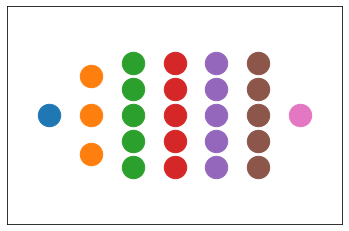

In [2]:
mynetwork = Network(1)
mynetwork.add_layer(number_of_neurons = 3 , activation=relu)
mynetwork.add_layer(number_of_neurons = 5 , activation=relu)
mynetwork.add_layer(number_of_neurons = 5 , activation=relu)
mynetwork.add_layer(number_of_neurons = 5 , activation=relu)
mynetwork.add_layer(number_of_neurons = 5 , activation=relu)
mynetwork.add_layer(number_of_neurons = 1, activation=sigmoid)
mynetwork.reinitialize_all_weights()
mynetwork.summary()

# Define dataset

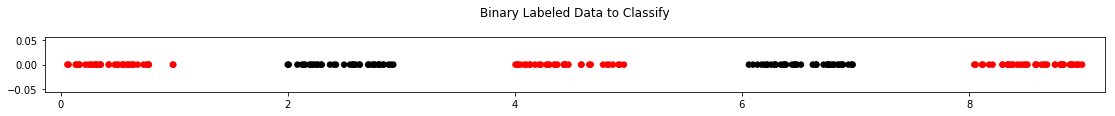

In [3]:
X_train, Y_train, X_val, Y_val, C, R = nregion.load_data(regions=5)
nregion.graph(X_train,Y_train)

# Create real gradients and gradient approximation vectors

In [13]:
fake_grads = compute_grad_approximations(mynetwork, X_train, Y_train)
mynetwork.reinitialize_all_weights()
grads = mynetwork.backward(X_train, Y_train)

In [14]:
fake_grads['L2']['dW']

array([[-5.69472247e-05,  0.00000000e+00, -3.49617002e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.28056399e-03,  0.00000000e+00, -8.06910927e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [15]:
grads['L2']['dW']

array([[-5.69464990e-05,  0.00000000e+00, -3.49616928e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.28056450e-03,  0.00000000e+00, -8.06910939e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [7]:
fake_grads = concatenate_grads(fake_grads,mynetwork)
grads = concatenate_grads(grads,mynetwork)

# Gradient Check

### Get Euclidean distance between grads and fake_grads

In [9]:
result = np.linalg.norm(grads-fake_grads) / (np.linalg.norm(grads)+np.linalg.norm(fake_grads))
# Result should be a small number
result

2.367576787810903e-09

In [10]:
result < 1e-7

True